Treballarem el dataset que hem utilitzat per fer les visualitzacions per generar un model de regressió que ens permeti calcular un índex de turistificació relacionat amb la variació de població.

In [2]:
#Carrega el dataset
import pandas as pd

df = pd.read_excel('../Data_cleaning/def_dataset/bcnGentTableau.xlsx')

In [3]:
#Mostra llistat d'indicadors
df['Indicador'].unique()

array(['Poblacio_total', 'Poblacio_sense_estudis', 'Poblacio_univ',
       'Poblacio_20_40', 'Universitaris_20_40_relatiu',
       'Universitaris_20_40_total', 'renda_mitjana', 'renda_Gini',
       'Saldo_migratori', 'poblacio_immigrant', 'Emigrants',
       'Emigrants_fora_BCN', 'Emigrants_Africa_Asia',
       'Immigrants_inc_renda', 'poblacio_IDH_sup', 'poblacio_IDH_inf',
       'Empadronats_sols', 'Contractes_lloguer', 'Preu_lloguer',
       'Total_comercos', 'Comercos_quotidians', 'Restaurants',
       'Taules_terrasses', 'Allotjaments', 'Oci_nocturn',
       'Teatres_espectacles', 'Museus', 'Parcs', 'Punts_interes_turistic',
       'Assistents_cultura', 'Espais_participacio', 'Max_soroll',
       'Avg_soroll', 'Max_aforament', 'Avg_aforament'], dtype=object)

In [4]:
# Seleccionem els indicadors desitjats
indicadors = ['Poblacio_total', 'Comercos_quotidians', 'Restaurants', 'Taules_terrasses',
              'Allotjaments', 'Oci_nocturn', 'Teatres_espectacles', 'Museus',
              'Parcs', 'Punts_interes_turistic', 'Assistents_cultura',
              'Max_soroll', 'Avg_soroll', 'Max_aforament', 'Avg_aforament']

df_filtrat = df[df['Indicador'].isin(indicadors)]

In [5]:
#Filtrem només per les columnes desitjades
columnes = ['Codi_Barri', 'Nom_Barri', 'Any', 'Indicador', 'Valor']
df_filtrat = df_filtrat[columnes]

In [6]:
# Pivotem la taula per a que cada indicador sigui una columna
df_pivot = df_filtrat.pivot_table(index=['Codi_Barri', 'Nom_Barri', 'Any'], columns='Indicador', values='Valor')
df_pivot = df_pivot.reset_index()
df_pivot.head()

Indicador,Codi_Barri,Nom_Barri,Any,Allotjaments,Assistents_cultura,Avg_aforament,Avg_soroll,Comercos_quotidians,Max_aforament,Max_soroll,Museus,Oci_nocturn,Parcs,Poblacio_total,Punts_interes_turistic,Restaurants,Taules_terrasses,Teatres_espectacles
0,1,el Raval,2015,67.395264,2263297.0,NaN,63.235959,0.0,NaN,93.0,3.642987,34.608379,0.0,46843.0,30.965392,82.877960,0.000000,2.732240
1,1,el Raval,2016,67.395264,2199529.0,NaN,63.546402,0.0,NaN,89.1,3.642987,36.429872,0.0,46871.0,30.965392,93.806922,0.000000,2.732240
2,1,el Raval,2017,68.306011,2166138.0,15292.807663,63.258872,0.0,43808.743169,85.9,3.642987,39.162113,0.0,47561.0,33.697632,97.449909,0.000000,2.732240
3,1,el Raval,2018,233.636364,2280435.0,10825.033394,63.413147,0.0,37517.272727,91.8,3.636364,40.909091,0.0,47169.0,33.636364,120.000000,0.000000,2.727273
4,1,el Raval,2019,248.181818,2298868.0,11504.903369,63.123314,0.0,46858.181818,87.6,3.636364,41.818182,0.0,47882.0,33.636364,123.636364,862.727273,2.727273


Ara calculem la variació de població respecte l'any anterior per cada barri.

In [8]:
# Calcula la variació anual de la Poblacio_total en percentatge
df_pivot['Variacio_Poblacio'] = df_pivot.groupby('Codi_Barri')['Poblacio_total'].pct_change() * 100

df_pivot.head()

Indicador,Codi_Barri,Nom_Barri,Any,Allotjaments,Assistents_cultura,Avg_aforament,Avg_soroll,Comercos_quotidians,Max_aforament,Max_soroll,Museus,Oci_nocturn,Parcs,Poblacio_total,Punts_interes_turistic,Restaurants,Taules_terrasses,Teatres_espectacles,Variacio_Poblacio
0,1,el Raval,2015,67.395264,2263297.0,NaN,63.235959,0.0,NaN,93.0,3.642987,34.608379,0.0,46843.0,30.965392,82.877960,0.000000,2.732240,NaN
1,1,el Raval,2016,67.395264,2199529.0,NaN,63.546402,0.0,NaN,89.1,3.642987,36.429872,0.0,46871.0,30.965392,93.806922,0.000000,2.732240,0.059774
2,1,el Raval,2017,68.306011,2166138.0,15292.807663,63.258872,0.0,43808.743169,85.9,3.642987,39.162113,0.0,47561.0,33.697632,97.449909,0.000000,2.732240,1.472126
3,1,el Raval,2018,233.636364,2280435.0,10825.033394,63.413147,0.0,37517.272727,91.8,3.636364,40.909091,0.0,47169.0,33.636364,120.000000,0.000000,2.727273,-0.824205
4,1,el Raval,2019,248.181818,2298868.0,11504.903369,63.123314,0.0,46858.181818,87.6,3.636364,41.818182,0.0,47882.0,33.636364,123.636364,862.727273,2.727273,1.511586


La variació de població que es dona l'any 2016, per exemple, no hauria d'estar relacionada amb els valors d'altres variables de l'any 2016, sinó amb les del 2015. Per tant, farem que la variació de població 2016 aparegui al registre de l'any 2015, i així succesivament.

In [10]:
df_pivot['Variacio_Poblacio'] = df_pivot.groupby('Codi_Barri')['Variacio_Poblacio'].shift(-1)
df_pivot.head()

Indicador,Codi_Barri,Nom_Barri,Any,Allotjaments,Assistents_cultura,Avg_aforament,Avg_soroll,Comercos_quotidians,Max_aforament,Max_soroll,Museus,Oci_nocturn,Parcs,Poblacio_total,Punts_interes_turistic,Restaurants,Taules_terrasses,Teatres_espectacles,Variacio_Poblacio
0,1,el Raval,2015,67.395264,2263297.0,NaN,63.235959,0.0,NaN,93.0,3.642987,34.608379,0.0,46843.0,30.965392,82.877960,0.000000,2.732240,0.059774
1,1,el Raval,2016,67.395264,2199529.0,NaN,63.546402,0.0,NaN,89.1,3.642987,36.429872,0.0,46871.0,30.965392,93.806922,0.000000,2.732240,1.472126
2,1,el Raval,2017,68.306011,2166138.0,15292.807663,63.258872,0.0,43808.743169,85.9,3.642987,39.162113,0.0,47561.0,33.697632,97.449909,0.000000,2.732240,-0.824205
3,1,el Raval,2018,233.636364,2280435.0,10825.033394,63.413147,0.0,37517.272727,91.8,3.636364,40.909091,0.0,47169.0,33.636364,120.000000,0.000000,2.727273,1.511586
4,1,el Raval,2019,248.181818,2298868.0,11504.903369,63.123314,0.0,46858.181818,87.6,3.636364,41.818182,0.0,47882.0,33.636364,123.636364,862.727273,2.727273,-0.083539


In [11]:
#Eliminem la variable Poblacio_total que ja no ens interessa
df_pivot = df_pivot.drop('Poblacio_total', axis=1)
df_pivot.head()

Indicador,Codi_Barri,Nom_Barri,Any,Allotjaments,Assistents_cultura,Avg_aforament,Avg_soroll,Comercos_quotidians,Max_aforament,Max_soroll,Museus,Oci_nocturn,Parcs,Punts_interes_turistic,Restaurants,Taules_terrasses,Teatres_espectacles,Variacio_Poblacio
0,1,el Raval,2015,67.395264,2263297.0,NaN,63.235959,0.0,NaN,93.0,3.642987,34.608379,0.0,30.965392,82.877960,0.000000,2.732240,0.059774
1,1,el Raval,2016,67.395264,2199529.0,NaN,63.546402,0.0,NaN,89.1,3.642987,36.429872,0.0,30.965392,93.806922,0.000000,2.732240,1.472126
2,1,el Raval,2017,68.306011,2166138.0,15292.807663,63.258872,0.0,43808.743169,85.9,3.642987,39.162113,0.0,33.697632,97.449909,0.000000,2.732240,-0.824205
3,1,el Raval,2018,233.636364,2280435.0,10825.033394,63.413147,0.0,37517.272727,91.8,3.636364,40.909091,0.0,33.636364,120.000000,0.000000,2.727273,1.511586
4,1,el Raval,2019,248.181818,2298868.0,11504.903369,63.123314,0.0,46858.181818,87.6,3.636364,41.818182,0.0,33.636364,123.636364,862.727273,2.727273,-0.083539


In [12]:
#Eliminem l'any 2022, donat que no existeix variació de població ja què no tenim dades del 2023. Recordem que la variació de població l'any 2022
#fa referència a la variació del 2023 respecte al 2022, és a dir, la població que el 2023 es perdrà com a conseqüència d'altres factors el 2022.
df_pivot = df_pivot[df_pivot['Any']!=2022]

In [13]:
# Calculem el percentatge de valors nuls per columna
percentatge_nuls = df_pivot.isnull().sum() / len(df_pivot) * 100

percentatge_nuls

Indicador
Codi_Barri                 0.000000
Nom_Barri                  0.000000
Any                        0.000000
Allotjaments               0.000000
Assistents_cultura         0.000000
Avg_aforament             56.164384
Avg_soroll                50.880626
Comercos_quotidians        0.000000
Max_aforament             56.164384
Max_soroll                50.880626
Museus                     0.000000
Oci_nocturn                0.000000
Parcs                      0.000000
Punts_interes_turistic     0.000000
Restaurants                0.000000
Taules_terrasses           0.000000
Teatres_espectacles        0.000000
Variacio_Poblacio          0.000000
dtype: float64

In [14]:
# Filtra les columnes amb valors nuls
columnes_amb_nuls = percentatge_nuls[percentatge_nuls > 0].index

# Mostra el resum estadístic de les columnes amb valors nuls
print(df_pivot[columnes_amb_nuls].describe())

Indicador  Avg_aforament  Avg_soroll  Max_aforament  Max_soroll
count         224.000000  251.000000     224.000000  251.000000
mean        10414.432557   62.268229   32027.279477   88.413546
std          8672.297697    4.418134   22309.168679    7.552863
min           880.968478   44.628369    3139.757498   57.500000
25%          4602.480164   59.072560   15270.316818   85.100000
50%          7957.502113   62.588414   25683.970856   88.200000
75%         13349.817526   65.632769   44588.225676   92.900000
max         42512.457114   71.164943  105160.975610  113.300000


In [15]:
# Imputació de valors nuls amb la mitjana per columna
for column in columnes_amb_nuls:
    df_pivot[column] = df_pivot[column].fillna(df_pivot[column].mean())

Ara comprovarem com es troben de correlacionades les variables amb la variació de població.

Indicador               Allotjaments  Assistents_cultura  Avg_aforament  \
Indicador                                                                 
Allotjaments                1.000000            0.232058       0.045423   
Assistents_cultura          0.232058            1.000000      -0.001040   
Avg_aforament               0.045423           -0.001040       1.000000   
Avg_soroll                  0.093011            0.221026       0.085819   
Comercos_quotidians         0.147052           -0.027873      -0.051251   
Max_aforament               0.204527            0.059652       0.734707   
Max_soroll                  0.274193            0.147911      -0.069020   
Museus                      0.242120            0.592770      -0.023895   
Oci_nocturn                 0.487713            0.403638       0.002955   
Parcs                      -0.004869            0.348792      -0.088997   
Punts_interes_turistic      0.306277            0.330796       0.051370   
Restaurants              

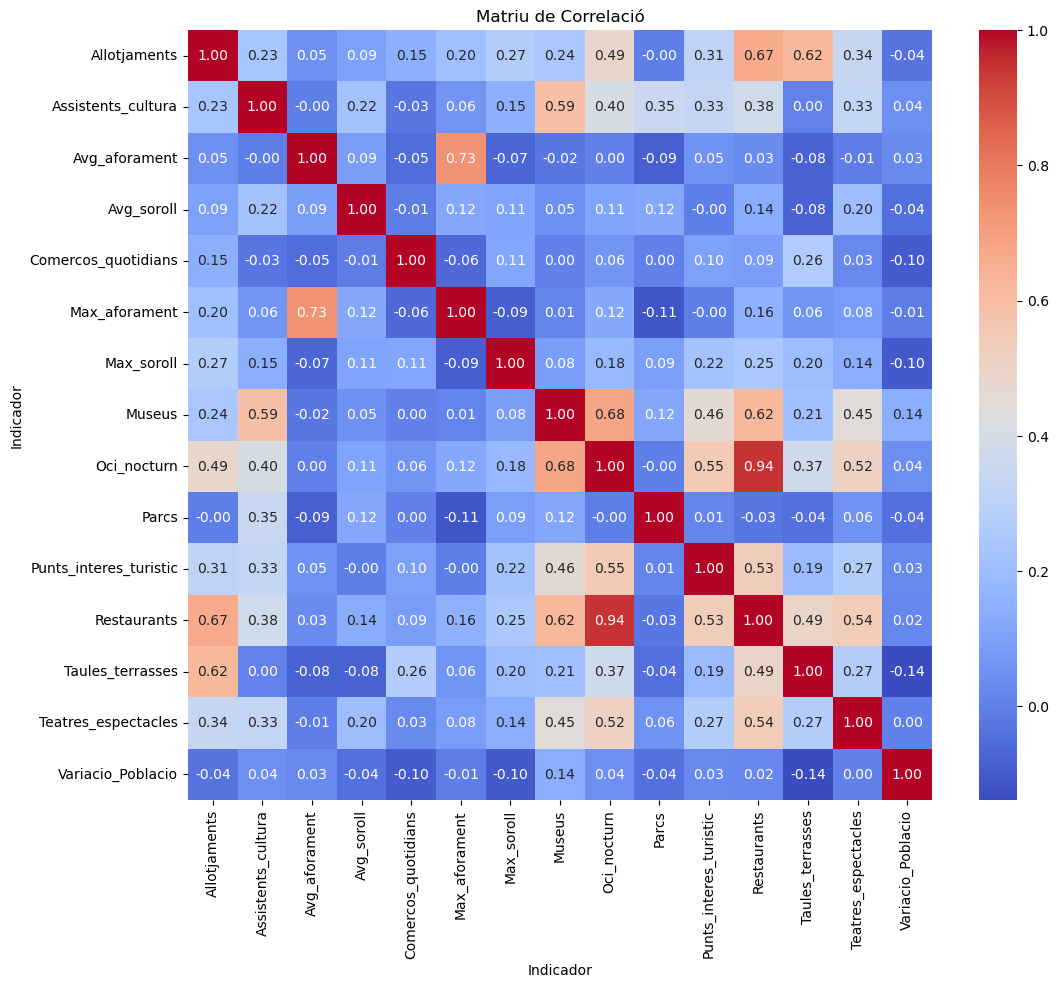

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Elimina les columnes especificades
columnes_eliminar = ['Any', 'Codi_Barri', 'Nom_Barri']
df_analysis = df_pivot.drop(columns=columnes_eliminar, errors='ignore')

# Calcula la matriu de correlació
correlation_matrix = df_analysis.corr()

# Mostra la matriu de correlació
print(correlation_matrix)

# Crea un mapa de calor de la matriu de correlació
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriu de Correlació')
plt.show()

Descartarem algunes variables per la seva baixa correlació amb la variació de població. Concretament, aquelles que tenen un coeficient de correlació en valor absolut inferior a 0,05. De la mateixa manera, donat l'alta correlacio entre les variables Restaurants i Taules_terrasses, i Restaurants amb Allotjaments, descartarem la variable Restaurants. Per contra, tot i tenir un coeficient de correlació inferior a 0.05, creiem que la variable Oci_nocturn podria ser important en aquest coeficient que volem calcular.

Mean Squared Error: 5.3043264870197255
R-squared: 0.15637903025011313


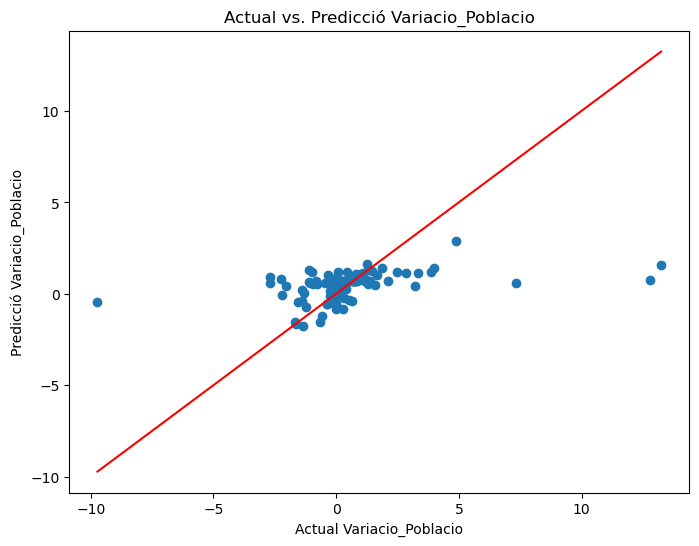

Coeficients del model:
Allotjaments: 0.0017393043337746645
Assistents_cultura: -3.141775806220274e-07
Avg_aforament: 2.280886311259777e-06
Max_soroll: -0.041376880579319854
Museus: 0.2595454033672822
Oci_nocturn: -0.011994267409896744
Taules_terrasses: -0.0012501996008995125
Intercept: 4.319691069359022


In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Defineix els atributs (X) i la variable objectiu (y)
X = df_pivot.drop(columns=['Any', 'Codi_Barri', 'Nom_Barri', 'Avg_soroll', 'Comercos_quotidians',
                           'Max_aforament', 'Parcs', 'Punts_interes_turistic', 'Restaurants', 'Teatres_espectacles',
                           'Variacio_Poblacio'], errors='ignore')
y = df_pivot['Variacio_Poblacio']

# Divideix en conjunt d'entrenament i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea i entrena el model
model = LinearRegression()
model.fit(X_train, y_train)

# Fer prediccions
y_pred = model.predict(X_test)

# Avaluem el model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Representem gràficament els resultats
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Variacio_Poblacio")
plt.ylabel("Predicció Variacio_Poblacio")
plt.title("Actual vs. Predicció Variacio_Poblacio")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Add a diagonal line
plt.show()

# Mostra els coeficients
print("Coeficients del model:")
for i, col in enumerate(X.columns):
  print(f"{col}: {model.coef_[i]}")

print(f"Intercept: {model.intercept_}")

Utilitzarem aquest model per calcular la nova variables 'Index_turistificació', i el normalitzarem de 0 a 1.

---



In [21]:


# Calcula 'Index_turistificacio'
df_pivot['Index_turistificacio'] = model.predict(X.fillna(X.mean()))

# Normalitza en el rang [0, 1]
min_index = df_pivot['Index_turistificacio'].min()
max_index = df_pivot['Index_turistificacio'].max()

df_pivot['Index_turistificacio'] = (df_pivot['Index_turistificacio'] - min_index) / (max_index - min_index)

print(df_pivot.head())

Indicador  Codi_Barri Nom_Barri   Any  Allotjaments  Assistents_cultura  \
0                   1  el Raval  2015     67.395264           2263297.0   
1                   1  el Raval  2016     67.395264           2199529.0   
2                   1  el Raval  2017     68.306011           2166138.0   
3                   1  el Raval  2018    233.636364           2280435.0   
4                   1  el Raval  2019    248.181818           2298868.0   

Indicador  Avg_aforament  Avg_soroll  Comercos_quotidians  Max_aforament  \
0           10414.432557   63.235959                  0.0   32027.279477   
1           10414.432557   63.546402                  0.0   32027.279477   
2           15292.807663   63.258872                  0.0   43808.743169   
3           10825.033394   63.413147                  0.0   37517.272727   
4           11504.903369   63.123314                  0.0   46858.181818   

Indicador  Max_soroll    Museus  Oci_nocturn  Parcs  Punts_interes_turistic  \
0            

Ara canviarem, perquè els valors més baixos d'Índex de turistificació s'assignen a disminucions de població, i a la inversa. Farem que els valors baixos siguin creixements, ja què l'índex hauria d'indicar què, quant més elevat sigui, més població marxa.

In [23]:
# Inverteix els valors de l'índex de turistificació
df_pivot['Index_turistificacio'] = 1 - df_pivot['Index_turistificacio']

print(df_pivot.head())

Indicador  Codi_Barri Nom_Barri   Any  Allotjaments  Assistents_cultura  \
0                   1  el Raval  2015     67.395264           2263297.0   
1                   1  el Raval  2016     67.395264           2199529.0   
2                   1  el Raval  2017     68.306011           2166138.0   
3                   1  el Raval  2018    233.636364           2280435.0   
4                   1  el Raval  2019    248.181818           2298868.0   

Indicador  Avg_aforament  Avg_soroll  Comercos_quotidians  Max_aforament  \
0           10414.432557   63.235959                  0.0   32027.279477   
1           10414.432557   63.546402                  0.0   32027.279477   
2           15292.807663   63.258872                  0.0   43808.743169   
3           10825.033394   63.413147                  0.0   37517.272727   
4           11504.903369   63.123314                  0.0   46858.181818   

Indicador  Max_soroll    Museus  Oci_nocturn  Parcs  Punts_interes_turistic  \
0            

In [24]:
#Eliminem totes les columnes excepte l'Índex_turistificació, el Codi_Barri, Nom_Barri i Any
columnes = ['Codi_Barri', 'Nom_Barri', 'Any', 'Index_turistificacio']
df_pivot = df_pivot[columnes]
df_pivot.head()

Indicador,Codi_Barri,Nom_Barri,Any,Index_turistificacio
0,1,el Raval,2015,0.604424
1,1,el Raval,2016,0.575737
2,1,el Raval,2017,0.553652
3,1,el Raval,2018,0.558208
4,1,el Raval,2019,0.719056


In [25]:
# Assignem la superfície a partir de 'Codi_Barri' i 'Any'
df_pivot = pd.merge(df_pivot, df[['Codi_Barri', 'Any', 'Superficie (km2)']], on=['Codi_Barri', 'Any'], how='left')

print(df_pivot.head())

   Codi_Barri Nom_Barri   Any  Index_turistificacio  Superficie (km2)
0           1  el Raval  2015              0.604424             1.098
1           1  el Raval  2015              0.604424             1.098
2           1  el Raval  2015              0.604424             1.098
3           1  el Raval  2015              0.604424             1.098
4           1  el Raval  2015              0.604424             1.098


In [26]:
# Afegim les columnes necessàries i canviem noms per afegir-lo al dataset original
df_pivot['Indicador'] = 'Index_turistificacio'
df_pivot = df_pivot.rename(columns = {'Index_turistificacio': 'Valor'})
df_pivot.head()

,Codi_Barri,Nom_Barri,Any,Valor,Superficie (km2),Indicador
0,1,el Raval,2015,0.604424,1.098,Index_turistificacio
1,1,el Raval,2015,0.604424,1.098,Index_turistificacio
2,1,el Raval,2015,0.604424,1.098,Index_turistificacio
3,1,el Raval,2015,0.604424,1.098,Index_turistificacio
4,1,el Raval,2015,0.604424,1.098,Index_turistificacio


In [27]:
# Unim els datasets
df = pd.concat([df, df_pivot], ignore_index=True)

print(df.head())

   Codi_Barri Nom_Barri   Any  Superficie (km2)       Indicador    Valor
0           1  el Raval  2015             1.098  Poblacio_total  46843.0
1           1  el Raval  2016             1.098  Poblacio_total  46871.0
2           1  el Raval  2017             1.098  Poblacio_total  47561.0
3           1  el Raval  2018             1.100  Poblacio_total  47169.0
4           1  el Raval  2019             1.100  Poblacio_total  47882.0


In [29]:
# Exportem i substituim el dataset original de Tableau
df.to_excel('bcnGentTableau.xlsx', index=False)